#  Time Series Smoothing Methods

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@ciencias.unam.mx
> * isc.ErickAguilar@gmail.com
---

#  Introduction to time series
___

The succession of events and the way they relate to the concepts of present, past and future. Explaining the past and predicting the future is a reason for constant reflection and study from the origins of humanity.

In statistics there are some objetive techniques to predicting the future. Some techniques can be classified as descriptive and other ones as inferencial when considering the presence of a probability distribution. All of them, of course, try to minimize errors in themselves and all of them rely on some fundamental principles:

* Have enought information about the past.
* The information must be quantifiable in some form of associated data at regular time intervals.
* It is assumed that there is some inertia in the studied phenomenon that results in patterns that are repeated at least partially in the future.

From the descriptive point of view we can consider a time series as a set of tuples $\{(t, X)\}_{t=1}^n $ or $\{X_t\}_{t=1}^n $ where $ t $ is an index (usually time) and $ X $ is corresponds a value to the observation at a time t of a particular variable of interest, regarding this paradigm it is possible to identify some elements or components of a time series:

* **Trend**: It is associated with the general presented direction by the plot of a time series. The trend can be manifested in the form of a straight line or a greater complex function
* **Cyclical variations**: It refers to long-term oscillations, usually years, around the trend. Cycles in economics are associated with periods of prosperity or depression. They usually require many observations to identify their presence.
* **Seasonal variations**: These are oscillations of short duration (months, weeks or days) that usually present some phenomena such as the sales of sporting goods or the consumption of electrical energy.
* **Random variations (Noise)**: These are irregularities due to the presence of unquantified or unknown factors that influence the behavior of the phenomenon.

**Example:** The following time series represents the number of stock prices during 8 years

,Yt
Mes,
01/01/90,169
01/02/90,127
01/03/90,235
01/04/90,314
01/05/90,343
01/06/90,345
01/07/90,377
01/08/90,346
01/09/90,348


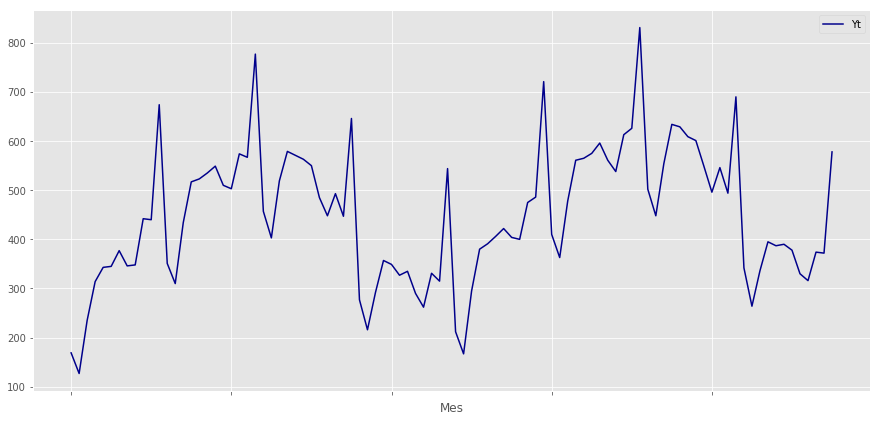

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
timeSeriesPD = pd.read_csv('DataSets/precios.csv',index_col='Mes')
display(timeSeriesPD[:12])
plt.style.use('ggplot')
plt.figure(figsize=(12,7))
timeSeriesPD[['Yt']].plot(figsize=(15,7),color='darkblue')
plt.show()

## Moving average smoothing
___

Moving average smoothing is one of the simplest forecasting procedures it is used to compute the average k previous observations and consider it as the best forecast option for the next period. After a period, the last observation is added to the average and the last one is discarded to calculate the average again. Particularly if k=1, then the last observation is considered the best forecast for the next one.


$$
\begin{align*}
\hat{Y}_{t+1} &= \frac{Y_{t}+Y_{t-1}+\dots+Y_{t-(k-1)}}{k} \\
&= \frac{Y_{t}+Y_{t-1}+\dots+Y_{t-(k-1)}}{k}+\frac{Y_{t-k}}{k}-\frac{Y_{t-k}}{k} \\
&= \frac{Y_t}{k} + \frac{Y_{t-1}+\dots+Y_{t-(k-1)}+Y_{t-k}}{k}-\frac{Y_{t-k}}{k} \\
&= \frac{Y_t}{k} + \hat{Y}_{t} -\frac{Y_{t-k}}{k} \\
\hat{Y}_{t+1} &= \hat{Y}_{t} + \frac{Y_t}{k} -\frac{Y_{t-k}}{k} \\
\end{align*}
$$

These equations derive an alternative form of moving average computation based on the previous moving average, adding the difference between the last publication and the last one. If the moving average is computed consecutively, a smoothing of the series is observed. As larger the value of k the smoothing is the effect increases. In practice this smoothing is often used as a filter for random variations.

When the moving average is used only for smoothing the series and not for the forecast purposes is better the use of the moving average centered. It consists to associate the calculated moving average to the central observation of the k (for an odd k) observation involved in the computation. This prevents the displacements of the series to the right.

$$\hat{Y}_{t-\frac{k}{2}} = \frac{1}{k} \sum_{i=1}^{k-1} Y_{t-i}$$

**Example:** Milk productions pounds

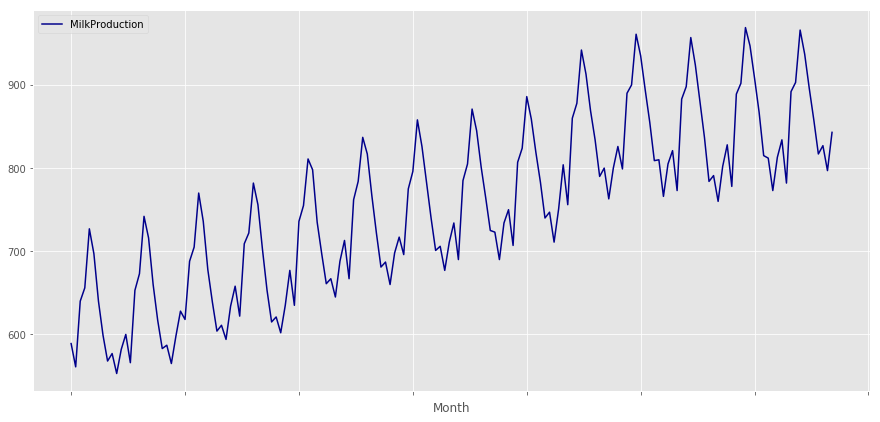

In [2]:
milkTimeSeriesPD = pd.read_csv('DataSets/MilkProductionPounds.csv',index_col='Month')
plt.style.use('ggplot')
plt.figure(figsize=(12,7))
milkTimeSeriesPD.plot(figsize=(15,7),color='darkblue')
plt.show()

In [3]:
col = 'MilkProduction'
period = 12
milkTimeSeriesPD = pd.read_csv('DataSets/MilkProductionPounds.csv',index_col='Month')
milkTimeSeriesPD[['MovingAvg']] = milkTimeSeriesPD[[col]].rolling(period).mean()
milkTimeSeriesPD[['MovingAvgCentered']] = milkTimeSeriesPD[[col]].rolling(period,center=True).mean()
display(milkTimeSeriesPD[:period*2])

,MilkProduction,MovingAvg,MovingAvgCentered
Month,,,
1962-01,589,NaN,NaN
1962-02,561,NaN,NaN
1962-03,640,NaN,NaN
1962-04,656,NaN,NaN
1962-05,727,NaN,NaN
1962-06,697,NaN,NaN
1962-07,640,NaN,615.750000
1962-08,599,NaN,616.666667
1962-09,568,NaN,617.083333


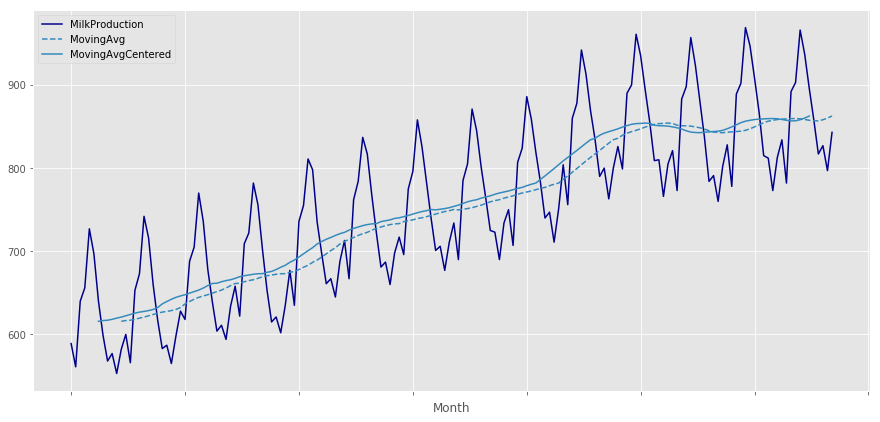

In [4]:
plt.style.use('ggplot')
styles = ['-','--','-']
colors = ['darkblue','C1','C1']
fig, ax = plt.subplots()
for col, styl, color in zip(milkTimeSeriesPD.columns,styles,colors):
    milkTimeSeriesPD[col].plot(style=styl,ax=ax,color=color,label=col,figsize=(15,7))
    plt.legend(loc='upper left')
plt.show()